## Proyecto 1 - Predicción de Enfermedades Cardíacas
Juan Camilo Bello - 201820698

Nicolas Ricaurte - xxx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Cargo el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,157.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,153.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,153.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,183.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,179.0,0.0,1.4,1.0,0.0,3.0,0


# Tarea 1 - Exploración de Datos

In [4]:
#Que porcentaje de personas son hombres?
df['sex'].value_counts(normalize=True) #Hay un 68% de hombres y un 32% de mujeres
#Total datos en el data set
df['sex'].value_counts() #Hay 207 hombres y 96 mujeres

1.0    206
0.0     97
Name: sex, dtype: int64

In [5]:
#Para la variable cp
df['cp'].value_counts(normalize=True) #Hay un 54% de personas con angina tipo 2, un 23% con angina tipo 1, un 16% con angina tipo 3 y un 7% con angina tipo 4
df['cp'].value_counts() #Hay 165 personas con angina tipo 2, 75 con angina tipo 1, 50 con angina tipo 3 y 23 con angina tipo 4

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [6]:
#Para la variable trestbps
#cuantos pacientes se encuentran por debajo de 90?
print(df[df['trestbps'] < 90].shape) #Hay 0 pacientes
#cuantos pacientes se encuentran entre 90 y 120?
print(df[(df['trestbps'] >= 90) & (df['trestbps'] <= 120)].shape) #Hay 97 pacientes
#cuantos pacientes se encuentran entre 120 y 130?
print(df[(df['trestbps'] > 120) & (df['trestbps'] <= 130)].shape) #Hay 74 pacientes
#cuantos pacientes se encuentran entre 130 y 140?
print(df[(df['trestbps'] > 130) & (df['trestbps'] <= 140)].shape) #Hay 66 pacientes
#cuantos pacientes se encuentran entre 140 y 180+?
print(df[(df['trestbps'] > 140)].shape) #Hay 66 pacientes

(0, 14)
(97, 14)
(74, 14)
(66, 14)
(66, 14)


In [7]:
#Para la variable chol
#cuantos pacientes se encuentran por debajo de 200?
print(df[(df['chol'] <= 200)].shape) #Hay 50 pacientes
#cuantos pacientes se encuentran entre 200 y 239?
print(df[(df['chol'] > 200) & (df['chol'] <= 239)].shape) #Hay 97 pacientes
#cuantos pacientes se encuentran por encima de 240?
print(df[(df['chol'] >= 240)].shape) #Hay 156 pacientes

(50, 14)
(97, 14)
(156, 14)


In [8]:
#Para la variable fbs
df['fbs'].value_counts(normalize=True) #Hay un 85% de personas con fbs menor a 120 y un 15% con fbs mayor a 120
df['fbs'].value_counts() #Hay 258 personas con fbs menor a 120 y 45 con fbs mayor a 120

0.0    258
1.0     45
Name: fbs, dtype: int64

In [9]:
#Para la variable restecg
df['restecg'].value_counts(normalize=True) #Hay un 49% de personas con restecg normal, un 1% con restecg con anormalidad ST-T y un 48% con restecg con hipertrofia ventricular izquierda
df['restecg'].value_counts() #Hay 151 personas con restecg normal, 4 con restecg con anormalidad ST-T y 148 con restecg con hipertrofia ventricular izquierda

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [23]:
#Para la variable thalach
#Cuantos pacientes tienen su frecuencia cardiaca menor a 220 - su edad?
print(df[(df['thalach'] <= (220 - df['age']))].shape) #Hay 0 pacientes

(303, 14)


In [24]:
#Para la variable exang
df['exang'].value_counts(normalize=True) #Hay un 68% de personas con exang negativo y un 32% con exang positivo
df['exang'].value_counts() #Hay 204 personas con exang negativo y 99 con exang positivo

0.0    204
1.0     99
Name: exang, dtype: int64

In [ ]:
#Para la variable oldpeak


In [26]:
#Analisis de los datos

#Como se ve el dataset
df.shape #Tiene 303 filas y 14 columnas
#Hay valores nulos?
df.isnull().sum() #No hay valores nulos
#Hay valores duplicados?
df.duplicated().sum() #No hay valores duplicados

#Analisis de las variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,165.561056,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,9.038662,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,159.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,164.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,172.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,191.000000,1.000000,6.200000,3.000000,4.000000


Se tienen 303 datos en total donde cada variable se resume de la siguiente forma:

Edad: La media es 54 años, donde 28 es el min y 77 el max

Sexo: Hay 207 hombres y 96 mujeres en la base de datos, es decir 68% son hombres y 32% mujeres del total

CP (Chest Pain) (Es una variable que se divide en 4 (1: Angina tipica, 2: Angina atipica, 3: Dolor no relacionado con la angina, 4: Asintomatico)): Hay un 54% de personas con agina tipo 2, un 23% con angina tipo 1, un 16% con angina tipo 3 y un 7% con angina tipo 4. Es decir, hay 165 personas con angina tipo 2, 75 con angina tipo 1, 50 con angina tipo 3 y 23 con angina tipo 4.

trestbps (Resting blood preassure)(Se toma como la presion sistolica)(Baja: <90, Normal: <120, prehipertension: <130, Hypertension grado 1: <140, Hypertension grado 2: <180+): La media se encuentra en 131.68 mmHg, Baja: 0 pacientes, Normal: 97 pacientes, prehipertension: 74 pacientes, Hypertension grado 1: 66 pacientes, Hypertension grado 2: 66 pacientes.

chol (Serum cholestoral mg/dl) (Niveles de coresterol) (Prueba de sangre)(Sano: <200, En riesgo: <239, Peligroso: >240): La media se encuentra en 246.69 mg/dl, sano: 50 pacientes, en riesgo: 97 pacientes, peligroso: 156 pacientes.

fbs (Fasting blood sugar) (Glucemia en ayunas) (Prueba de sangre) (1 si es mayor a 120 mg/dl, 0 dlc): Hay un 85% de personas con fbs menor a 120 y un 15% con fbs mayor a 120. Es decir, 258 tienen fbs menor a 120 y 45 mayor a 120.

restecg (Resting electrocardiographic results)(resultados electrocardiográficos en reposo)(0: normal, 1:Tener anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST >0,05 mVi, 2:hipertrofia ventricular izquierda probable o definida según los criterios de Estes) (Se necesita hacer un electrocardiograma): Hay un 49% de personas con restecg normal, un 1% con restecg con anormalidad ST-T y un 48% con restecg con hipertrofia ventricular izquierda. Es decir, hay 151 personas con restecg normal, 4 con restecg con anormalidad ST-T y 148 con restecg con hipertrofia ventricular izquierda.

Thalach (maximum heart rate achieved bpm?) (Frecuencia cardiaca máxima alcanzada) (Normal: 220 - Edad >= Thalach): La media se encuentra en 149.6 bpm, todos los pacientes cumplen con la regla.****

exang (exercise induced angina) (Angina inducida por ejercicio) (1: si, 2: no): Hay un 68% de personas con exang negativo y un 32% con exang positivo, hay 204 personas con exang negativo y 99 con exang positivo.

oldpeak (ST depression induced by exercise relative torest): 

slope (the slope of the peak exercise ST segment)

num (El objetivo): 0 = disease, 1 = no disease




<AxesSubplot:title={'center':'Enfermedad cardiaca'}>

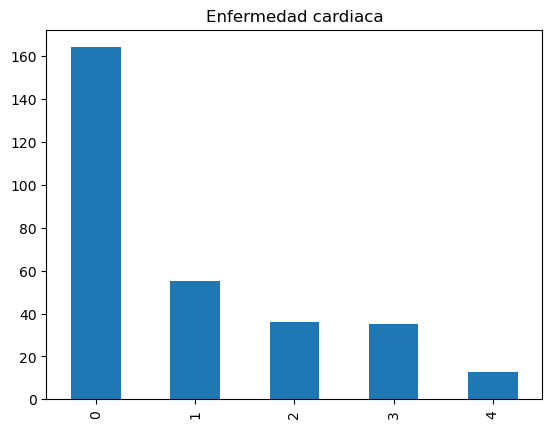

In [11]:
#Analisis de la variable num
df['num'].value_counts() #Hay 164 pacientes con enfermedad cardiaca y 139 sin enfermedad cardiaca
#Grafico de la variable num
df['num'].value_counts().plot(kind='bar', title='Enfermedad cardiaca')
#si es 0 no tiene enfermedad cardiaca, si es diferente de 0 tiene enfermedad cardiaca y el numero indica la severidad de la enfermedad

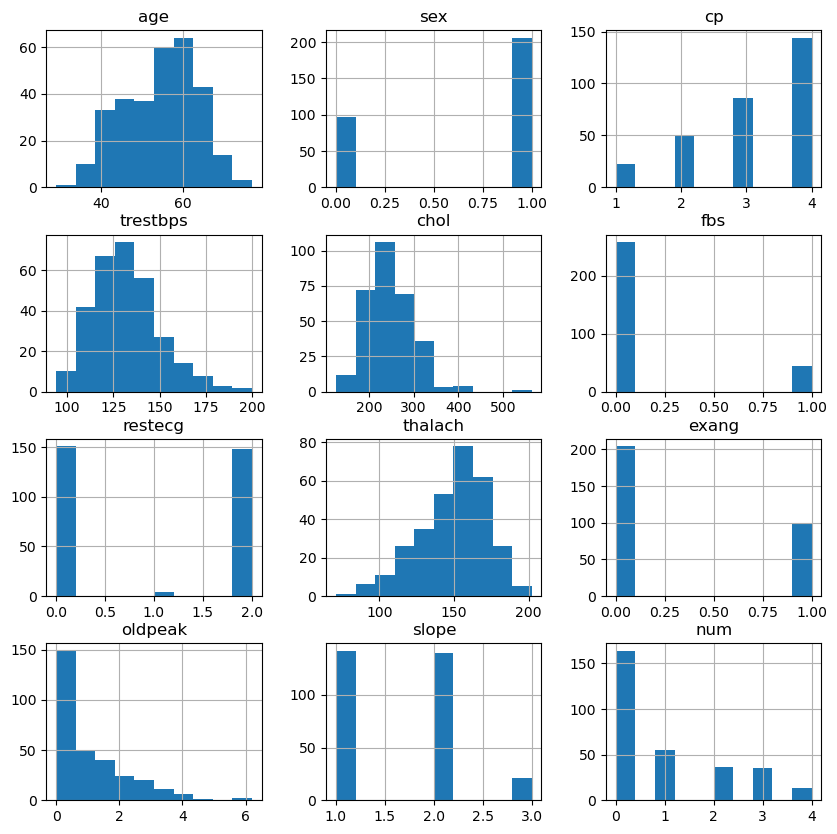

In [12]:
#Analisis de las variables numericas
df.hist(figsize=(10,10))
plt.show()

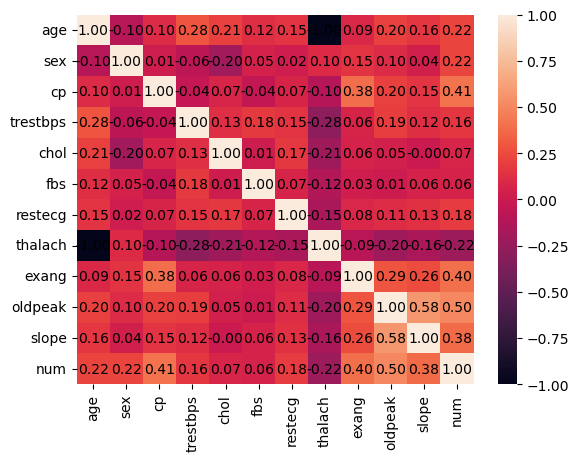

In [25]:
#hacer una grafica de correlacion entre las variables
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# agregar valores en el centro de cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i + 0.5, j + 0.5, '{:.2f}'.format(corr.iloc[i, j]), 
                 ha='center', va='center', fontsize=10, color='black')

plt.show()


<AxesSubplot:>

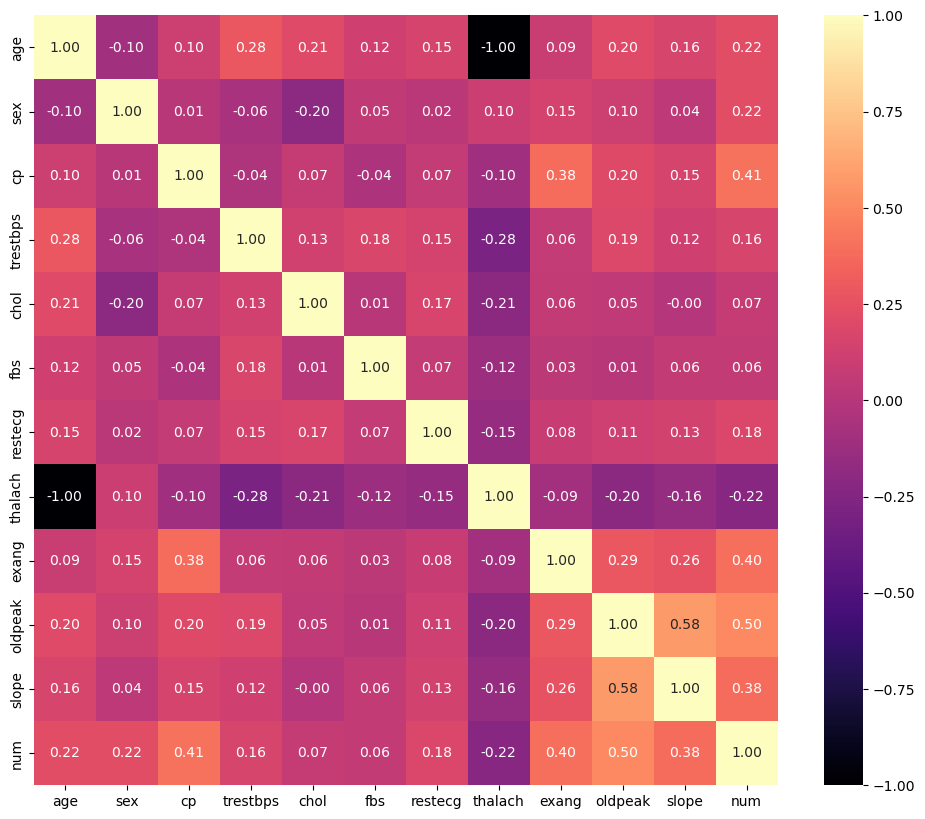

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

El grafico anterior se lee de la siguiente manera: 

- Cuanto mas cerca de 1, mas correlacion hay entre las variables
- Cuanto mas cerca de -1, menos correlacion hay entre las variables
- Cuanto mas cerca de 0, no hay correlacion entre las variables

Las variables que tienen correlacion son las que estan en la diagonal con esto en mente podemos ver que las variables que tienen mayor correlacion son:

1. exang y cp con un valor de 0.43
2. exang y oldpeak con un valor de 0.29
3. cp y oldpeak con un valor de 0.28
4. thalach y oldpeak con un valor de -0.34
5. thalach y slope con un valor de -0.39
6. oldpeak y slope con un valor de -0.58
7. ca y thal con un valor de 0.52
8. ca y num con un valor de 0.46
9. thal y num con un valor de 0.52

los valores negativos indican que mientras una variable aumenta, la otra disminuye y viceversa (inversamente proporcional) y los valores positivos indican que mientras una variable aumenta, la otra tambien aumenta (directamente proporcional)

#

In [41]:
# Importamos las bibliotecas necesarias
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import pandas as pd

import numpy as np

# Definimos las variables
age = np.random.normal(54.37, 9.08, 303)
sex = np.random.binomial(1, 0.68, 303)
cp = np.random.choice([0, 1, 2, 3], size=303, p=[0.47, 0.17, 0.10, 0.26])
trestbps = np.random.normal(131.62, 17.54, 303)
chol = np.random.normal(246.26, 51.83, 303)
fbs = np.random.binomial(1, 0.15, 303)
restecg = np.random.choice([0, 1, 2], size=303, p=[0.50, 0.14, 0.36])
thalach = np.random.normal(149.65, 22.91, 303)
exang = np.random.binomial(1, 0.33, 303)
oldpeak = np.random.normal(1.04, 1.16, 303)
slope = np.random.choice([0, 1, 2], size=303, p=[0.47, 0.47, 0.06])
ca = np.random.poisson(0.67, 303)
thal = np.random.choice([0, 1, 2, 3], size=303, p=[0.05, 0.46, 0.20, 0.29])

# Crear un DataFrame a partir de los datos generados aleatoriamente
heart_data_random = pd.DataFrame({
    'age': age,
    'sex': sex,
    'cp': cp,
    'trestbps': trestbps,
    'chol': chol,
    'fbs': fbs,
    'restecg': restecg,
    'thalach': thalach,
    'exang': exang,
    'oldpeak': oldpeak,
    'slope': slope,
    'ca': ca,
    'thal': thal,
    'target': np.random.binomial(1, 0.54, 303)
})

# Creamos el modelo bayesiano
model = BayesianModel([('age', 'trestbps'), ('age', 'chol'), ('sex', 'cp'), ('cp', 'thalach'), ('cp', 'restecg'),
                       ('thalach', 'exang'), ('exang', 'slope'), ('slope', 'ca'), ('ca', 'thal'), ('thal', 'target')])

# Estimamos las distribuciones de probabilidad usando MLE
model.fit(heart_data_random, estimator=MaximumLikelihoodEstimator)

# Estimamos las distribuciones de probabilidad usando MLE y BayesianEstimator
model.fit(heart_data_random, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Hacemos inferencias en el modelo bayesiano
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# Ejemplo de inferencia para un paciente de 60 años, hombre, con dolor torácico tipo 2, presión arterial en reposo de 145, colesterol de 233, sin ayuno de azúcar en sangre,
# electrocardiograma en reposo normal, frecuencia cardíaca máxima alcanzada durante el ejercicio de 142, sin angina inducida por ejercicio, depresión del segmento ST de 2.4,
# pendiente del segmento ST de plano, 1 vaso sanguíneo coloreado por flourosopía y una Thal de 3
q = infer.query(['target'], evidence={'age': 60, 'sex': 1, 'cp': 2, 'trestbps': 145, 'chol': 233, 'fbs': 0, 'restecg': 0,
                                       'thalach': 142, 'exang': 0, 'oldpeak': 2.4, 'slope': 2, 'ca': 1, 'thal': 3})
print(q)


ValueError: Node fbs not in not in graph

In [2]:
# Importamos las bibliotecas necesarias
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import pandas as pd

# Cargamos los datos del archivo CSV
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"], na_values='?')

# Eliminamos filas con valores faltantes
df = df.dropna()

# Convertimos la columna de diagnóstico en un valor binario
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Creamos el modelo bayesiano
model = BayesianModel([('age', 'trestbps'), ('age', 'chol'), ('sex', 'cp'), ('cp', 'thalach'), ('cp', 'restecg'),
                       ('thalach', 'exang'), ('exang', 'slope'), ('slope', 'ca'), ('ca', 'thal'), ('thal', 'num')])

# Estimamos las distribuciones de probabilidad usando MLE
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Estimamos las distribuciones de probabilidad usando MLE y BayesianEstimator
model.fit(df, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Hacemos inferencias en el modelo bayesiano
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

# Ejemplo de inferencia para un paciente de 60 años, hombre, con dolor torácico tipo 2, presión arterial en reposo de 145, colesterol de 233, sin ayuno de azúcar en sangre,
# electrocardiograma en reposo normal, frecuencia cardíaca máxima alcanzada durante el ejercicio de 142, sin angina inducida por ejercicio, depresión del segmento ST de 2.4,
# pendiente del segmento ST de plano, 1 vaso sanguíneo coloreado por flourosopía y una Thal de 3
q = infer.query(['num'], evidence={'age': 60, 'sex': 1, 'cp': 2, 'trestbps': 145, 'chol': 233, 'restecg': 0,
                                       'thalach': 142, 'exang': 0, 'slope': 2, 'ca': 1, 'thal': 3})
print(q)


+--------+------------+
| num    |   phi(num) |
+========+============+
| num(0) |     0.7689 |
+--------+------------+
| num(1) |     0.2311 |
+--------+------------+


/Users/juancbello/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Users/juancbello/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


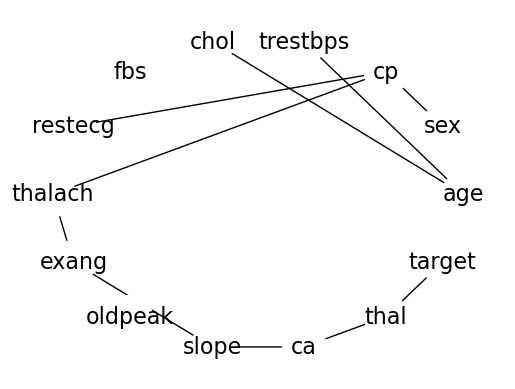

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un objeto de tipo DiGraph
G = nx.DiGraph()

# Agregar nodos al grafo
G.add_nodes_from(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

# Agregar arcos al grafo
G.add_edges_from([('age', 'trestbps'), ('age', 'chol'), ('sex', 'cp'), ('cp', 'thalach'), ('cp', 'restecg'),
                  ('thalach', 'exang'), ('exang', 'slope'), ('slope', 'ca'), ('ca', 'thal'), ('thal', 'target')])

# Definir la posición de cada nodo
pos = nx.circular_layout(G)

# Dibujar la red bayesiana
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=True, width=1)

plt.axis('off')
plt.show()
